## Neural Network
#### 1) PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

### ANSWER:

In [84]:
import pandas as pd #data processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # For data visulization purpose
import seaborn as sns #For statistical data visulization
sns.set()

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer, Lambda

In [85]:
#Get the file
forest_raw = pd.read_csv("forestfires.csv")

In [86]:
#Let's view top five rows by using head
forest_raw.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [87]:
# view dimensions of dataset
forest_raw.shape

(517, 31)

In [88]:
forest = forest_raw[['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','size_category']]

In [89]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [90]:
# view dimensions of dataset
forest.shape

(517, 11)

In [91]:
#Let's count duplicated rows
forest[forest.duplicated()].shape

(19, 11)

In [92]:
#Let's drop the duplicates
forest1=forest.drop_duplicates()

In [93]:
# view dimensions of dataset
forest1.shape

(498, 11)

In [94]:
#Let's find info about the data
forest1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          498 non-null    object 
 1   day            498 non-null    object 
 2   FFMC           498 non-null    float64
 3   DMC            498 non-null    float64
 4   DC             498 non-null    float64
 5   ISI            498 non-null    float64
 6   temp           498 non-null    float64
 7   RH             498 non-null    int64  
 8   wind           498 non-null    float64
 9   rain           498 non-null    float64
 10  size_category  498 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 46.7+ KB


### Statistical analysis of dataset

In [95]:
#Let's describe the dataset
forest1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,90.633133,110.559036,547.917470,9.052610,18.985542,44.305221,3.982329,0.020884
std,5.593386,63.860758,249.041722,4.586864,5.764932,16.297634,1.774095,0.299506
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,90.200000,68.875000,441.200000,6.500000,15.600000,33.000000,2.700000,0.000000
50%,91.600000,108.300000,664.350000,8.400000,19.350000,41.500000,4.000000,0.000000
75%,92.900000,141.300000,713.675000,11.000000,22.875000,53.000000,4.900000,0.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [96]:
#Correlation
forest1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.378272,0.327011,0.528125,0.427600,-0.319241,-0.015637,0.052313
DMC,0.378272,1.000000,0.681262,0.303506,0.465194,0.047667,-0.089319,0.071385
DC,0.327011,0.681262,1.000000,0.222965,0.497994,-0.059315,-0.192634,0.033993
ISI,0.528125,0.303506,0.222965,1.000000,0.383404,-0.145917,0.129018,0.062353
temp,0.427600,0.465194,0.497994,0.383404,1.000000,-0.564114,-0.199862,0.068113
RH,-0.319241,0.047667,-0.059315,-0.145917,-0.564114,1.000000,0.095462,0.095560
wind,-0.015637,-0.089319,-0.192634,0.129018,-0.199862,0.095462,1.000000,0.062040
rain,0.052313,0.071385,0.033993,0.062353,0.068113,0.095560,0.062040,1.000000


In [97]:
forest1['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [98]:
forest1['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [99]:
forest1['size_category'].unique()

array(['small', 'large'], dtype=object)

In [100]:
forest1.size_category.value_counts()

small    365
large    133
Name: size_category, dtype: int64

In [101]:
forest1['size_category'] = forest1['size_category'].map({'large':1,'small':0})
forest1['size_category']

<ipython-input-101-7fabd5529bad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest1['size_category'] = forest1['size_category'].map({'large':1,'small':0})


0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 498, dtype: int64

<AxesSubplot:xlabel='size_category'>

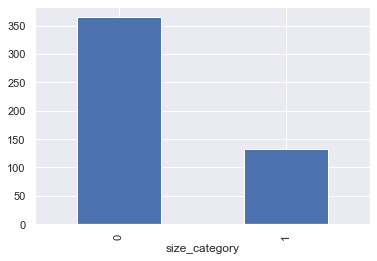

In [102]:
#Plot bargraph
forest1.value_counts(forest1['size_category']).plot.bar()

<AxesSubplot:xlabel='temp'>

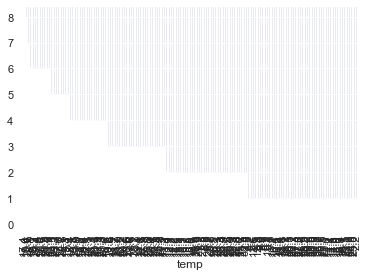

In [129]:
forest1.value_counts(forest1['temp']).plot.bar()

<AxesSubplot:xlabel='day'>

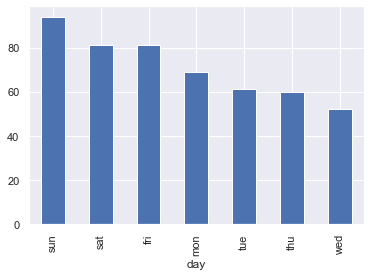

In [131]:
forest1.value_counts(forest1['day']).plot.bar()

<AxesSubplot:xlabel='month'>

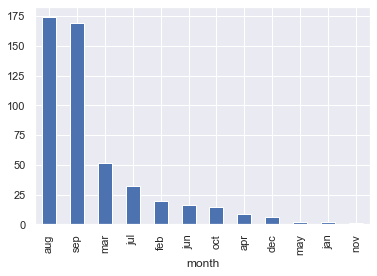

In [132]:
forest1.value_counts(forest1['month']).plot.bar()

In [103]:
#Let's take dependent and independent
X =forest1.drop('size_category',axis=1)
Y = forest1['size_category']

In [104]:
X = pd.get_dummies(X, drop_first = True)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_aug,month_dec,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
#Let's display top five rows
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: size_category, dtype: int64

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [107]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=25, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [108]:
import keras
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
# Fit the model
history=model.fit(X, Y, validation_split=0.30, epochs=150, batch_size=32,verbose=0)

In [110]:
# evaluate the model
scores = model.evaluate(X,Y)
#print("Test Loss: %.2f%%" % (scores[0]*100))
#print("Test Accuracy: %.2f%%" % (scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.7470
accuracy: 74.70%


In [111]:
# visualize training history
#list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


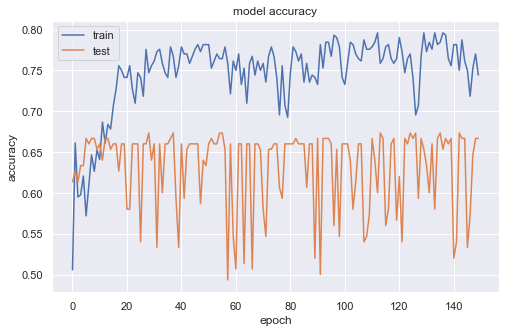

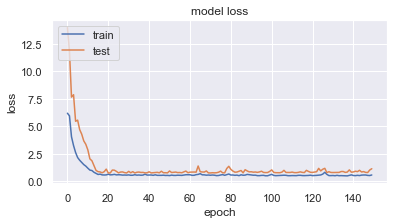

In [114]:
# summarise history and accuracy
import matplotlib.pyplot as plt
#matplotlib inline
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

# summarise hstory and loss
plt.figure(figsize = (6,3))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

### Hyperparameter Tuning

In [115]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [116]:
X_standardized

array([[-0.79336389, -1.32231224, -1.82328323, ..., -0.37011661,
        -0.37361491, -0.3414556 ],
       [-0.00592948, -1.17810395,  0.48708458, ..., -0.37011661,
         2.67655271, -0.3414556 ],
       [-0.00592948, -1.04800299,  0.55863042, ..., -0.37011661,
        -0.37361491, -0.3414556 ],
       ...,
       [-1.61659079, -0.8442304 ,  0.47301658, ..., -0.37011661,
        -0.37361491, -0.3414556 ],
       [ 0.67412752,  0.55553053,  0.26842764, ..., -0.37011661,
        -0.37361491, -0.3414556 ],
       [-1.99241176, -1.68596794, -1.77344231, ..., -0.37011661,
         2.67655271, -0.3414556 ]])

In [117]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,...,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02
mean,-1.726865e-15,2.229364e-16,-2.808998e-17,-6.465154e-17,2.189235e-16,2.474593e-16,-2.530328e-16,-1.054489e-16,2.204841e-16,-4.436991e-16,...,1.149794e-16,7.133963e-18,5.801919e-16,-4.320506e-16,-1.745592e-16,-3.661730e-16,9.541676e-17,-6.799559e-17,9.809199e-17,6.532035e-17
std,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,...,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00
min,-1.287332e+01,-1.715750e+00,-2.170562e+00,-1.975579e+00,-2.914591e+00,-1.799935e+00,-2.021274e+00,-6.979671e-02,-7.328281e-01,-1.104315e-01,...,-6.350006e-02,-4.485613e-02,-1.762268e-01,-7.167132e-01,-4.010476e-01,-4.407319e-01,-4.823622e-01,-3.701166e-01,-3.736149e-01,-3.414556e-01
25%,-7.751442e-02,-6.533895e-01,-4.289433e-01,-5.570641e-01,-5.878554e-01,-6.943700e-01,-7.235343e-01,-6.979671e-02,-7.328281e-01,-1.104315e-01,...,-6.350006e-02,-4.485613e-02,-1.762268e-01,-7.167132e-01,-4.010476e-01,-4.407319e-01,-4.823622e-01,-3.701166e-01,-3.736149e-01,-3.414556e-01
50%,1.730329e-01,-3.540997e-02,4.679923e-01,-1.424212e-01,6.328337e-02,-1.722975e-01,9.970407e-03,-6.979671e-02,-7.328281e-01,-1.104315e-01,...,-6.350006e-02,-4.485613e-02,-1.762268e-01,-7.167132e-01,-4.010476e-01,-4.407319e-01,-4.823622e-01,-3.701166e-01,-3.736149e-01,-3.414556e-01
75%,4.056840e-01,4.818589e-01,6.662506e-01,4.249849e-01,6.753538e-01,5.340359e-01,5.177814e-01,-6.979671e-02,1.364576e+00,-1.104315e-01,...,-6.350006e-02,-4.485613e-02,-1.762268e-01,1.395258e+00,-4.010476e-01,-4.407319e-01,-4.823622e-01,-3.701166e-01,-3.736149e-01,-3.414556e-01
max,9.962598e-01,2.833081e+00,1.256805e+00,1.026730e+01,2.485520e+00,3.420790e+00,3.056836e+00,2.132021e+01,1.364576e+00,9.055385e+00,...,1.574802e+01,2.229350e+01,5.674504e+00,1.395258e+00,2.493470e+00,2.268953e+00,2.073131e+00,2.701851e+00,2.676553e+00,2.928638e+00


#### Tuning of Hyperparameters :- Batch Size and Epochs

In [118]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.utils import np_utils


from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [119]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [120]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(3),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.578, total=   2.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.530, total=   1.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.669, total=   1.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.343, total=   2.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.494, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.639, total=   2.6s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.5s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.452, total=   4.1s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.6s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.494, total=   3.9s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.5s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.645, total=   3.8s
[CV] batch_size=20, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.3s remaining:    0.0s


[CV] ............ batch_size=20, epochs=10, score=0.440, total=   1.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.530, total=   1.1s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.669, total=   1.1s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.416, total=   1.7s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.488, total=   1.7s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.669, total=   1.9s
[CV] batch_size=20, epochs=100 .......................................
[CV] ........... batch_size=20, epochs=100, score=0.398, total=   2.6s
[CV] batch_size=20, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   53.6s finished


In [121]:
# Summarize the results
from sklearn.model_selection import GridSearchCV, KFold
grid_result = grid.fit(X_standardized,Y)
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.608, total=   1.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.530, total=   1.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.657, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.608, total=   2.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.512, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.651, total=   2.4s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.3s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.398, total=   4.1s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.5s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.482, total=   4.1s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.5s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.633, total=   4.1s
[CV] batch_size=20, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.7s remaining:    0.0s


[CV] ............ batch_size=20, epochs=10, score=0.711, total=   1.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.530, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.669, total=   1.2s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.476, total=   1.9s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.482, total=   1.8s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.633, total=   1.7s
[CV] batch_size=20, epochs=100 .......................................
[CV] ........... batch_size=20, epochs=100, score=0.482, total=   2.5s
[CV] batch_size=20, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   53.3s finished


Best : 0.6365461945533752, using {'batch_size': 20, 'epochs': 10}
0.5983935793240865,0.0521315471509669 with: {'batch_size': 10, 'epochs': 10}
0.5903614362080892,0.05799007574891546 with: {'batch_size': 10, 'epochs': 50}
0.5040160616238912,0.09717712193092838 with: {'batch_size': 10, 'epochs': 100}
0.6365461945533752,0.0771983244758758 with: {'batch_size': 20, 'epochs': 10}
0.5301204721132914,0.07245628741735952 with: {'batch_size': 20, 'epochs': 50}
0.5361445744832357,0.06833210983813338 with: {'batch_size': 20, 'epochs': 100}
0.6224899689356486,0.06531508352892851 with: {'batch_size': 40, 'epochs': 10}
0.5180722872416178,0.07572170490728276 with: {'batch_size': 40, 'epochs': 50}
0.4919678568840027,0.09717713506850836 with: {'batch_size': 40, 'epochs': 100}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [127]:
# Defining the model

from keras.layers import Dropout

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 25,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(8,input_dim =12,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs =100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(3),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=0.560, total=   4.7s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.530, total=   4.7s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.663, total=   4.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.2s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.458, total=   4.7s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.8s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.512, total=   5.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.8s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.669, total=   5.0s
[CV] activation_function=softmax, init=zero ..........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.8s remaining:    0.0s


[CV]  activation_function=softmax, init=zero, score=1.000, total=   5.1s
[CV] activation_function=softmax, init=zero ..........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   33.9s remaining:    0.0s


[CV]  activation_function=softmax, init=zero, score=0.482, total=   4.7s
[CV] activation_function=softmax, init=zero ..........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.5s remaining:    0.0s


[CV]  activation_function=softmax, init=zero, score=0.657, total=   4.9s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.4s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=1.000, total=   4.5s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.530, total=   4.4s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.669, total=   4.7s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=1.000, total=   4.4s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.530, total=   4.4s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.669, total=   4.5s
[CV] activation_function=relu, init=zero .............................
[CV] . activation_function=relu, init=zero, score=1.000, total=   4.6s
[CV] activation_function=relu, init=zero ...........................

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.7min finished


In [123]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7329317331314087, using {'activation_function': 'relu', 'init': 'uniform'}
0.586345374584198,0.060707707417752194 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6244980096817017,0.07561514265015509 with: {'activation_function': 'softmax', 'init': 'normal'}
0.608433723449707,0.07915823528723445 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7329317331314087,0.19713516856814192 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7329317331314087,0.19713516856814192 with: {'activation_function': 'relu', 'init': 'normal'}
0.7329317331314087,0.19713516856814192 with: {'activation_function': 'relu', 'init': 'zero'}
0.5883534252643585,0.06891969342321534 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.5582329233487447,0.03123767063393025 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7329317331314087,0.19713516856814192 with: {'activation_function': 'tanh', 'init': 'zero'}
0.5481927792231241,0.08618178666515385 with: {'activatio

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [124]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 25,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.01))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [8,12,16]
neuron2 = [4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(3),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=8, neuron2=4, score=1.000, total=   4.2s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.530, total=   4.1s
[CV] neuron1=8, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=4, score=0.669, total=   4.2s
[CV] neuron1=8, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.4s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=8, score=1.000, total=   4.2s
[CV] neuron1=8, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.6s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=8, score=0.530, total=   4.3s
[CV] neuron1=8, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.9s remaining:    0.0s


[CV] ................ neuron1=8, neuron2=8, score=0.669, total=   3.9s
[CV] neuron1=12, neuron2=4 ...........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.7s remaining:    0.0s


[CV] ............... neuron1=12, neuron2=4, score=1.000, total=   4.0s
[CV] neuron1=12, neuron2=4 ...........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.8s remaining:    0.0s


[CV] ............... neuron1=12, neuron2=4, score=0.530, total=   4.1s
[CV] neuron1=12, neuron2=4 ...........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   32.9s remaining:    0.0s


[CV] ............... neuron1=12, neuron2=4, score=0.669, total=   4.3s
[CV] neuron1=12, neuron2=8 ...........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   37.2s remaining:    0.0s


[CV] ............... neuron1=12, neuron2=8, score=1.000, total=   4.1s
[CV] neuron1=12, neuron2=8 ...........................................
[CV] ............... neuron1=12, neuron2=8, score=0.530, total=   4.3s
[CV] neuron1=12, neuron2=8 ...........................................
[CV] ............... neuron1=12, neuron2=8, score=0.669, total=   4.2s
[CV] neuron1=16, neuron2=4 ...........................................
[CV] ............... neuron1=16, neuron2=4, score=1.000, total=   4.5s
[CV] neuron1=16, neuron2=4 ...........................................
[CV] ............... neuron1=16, neuron2=4, score=0.530, total=   5.0s
[CV] neuron1=16, neuron2=4 ...........................................
[CV] ............... neuron1=16, neuron2=4, score=0.669, total=   4.0s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=1.000, total=   3.8s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.3min finished


In [125]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7329317331314087, using {'neuron1': 8, 'neuron2': 4}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 8, 'neuron2': 4}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 8, 'neuron2': 8}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 12, 'neuron2': 4}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 12, 'neuron2': 8}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 16, 'neuron2': 4}
0.7329317331314087,0.19713516856814192 with: {'neuron1': 16, 'neuron2': 8}


### Training model with optimum values of Hyperparameters

In [126]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 25,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(X_standardized,Y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y,y_predict))

0.8172690763052208


C:\Users\91830\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
